In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
import warnings
warnings.simplefilter("ignore")

In [53]:
df = pd.read_csv('train.csv')

In [54]:
df.head()

,no_of_previous_bookings_not_canceled,room_type_reserved,Booking_ID,no_of_children,repeated_guest,no_of_special_requests,no_of_adults,arrival_year,no_of_week_nights,type_of_meal_plan,booking_status,required_car_parking_space,market_segment_type,avg_price_per_room,arrival_date,no_of_weekend_nights,arrival_month,lead_time,no_of_previous_cancellations
0,0,Room_Type 1,INN30738,0,0,0,1,2018,1,Meal Plan 1,Not_Canceled,0,Offline,90.00,17,0,5,6,0
1,0,Room_Type 1,INN02831,0,0,1,3,2018,2,Meal Plan 1,Not_Canceled,0,Online,90.47,1,0,4,2,0
2,0,Room_Type 4,INN02284,0,0,0,2,2018,5,Meal Plan 1,Canceled,0,Online,132.30,11,0,10,128,0
3,0,Room_Type 1,INN33452,0,0,2,2,2018,2,Meal Plan 1,Not_Canceled,0,Online,139.00,21,0,10,29,0
4,0,Room_Type 4,INN13001,0,0,0,2,2018,5,Meal Plan 1,Canceled,0,Online,97.02,26,2,3,77,0


In [55]:
df.columns

Index(['no_of_previous_bookings_not_canceled', 'room_type_reserved',
       'Booking_ID', 'no_of_children', 'repeated_guest',
       'no_of_special_requests', 'no_of_adults', 'arrival_year',
       'no_of_week_nights', 'type_of_meal_plan', 'booking_status',
       'required_car_parking_space', 'market_segment_type',
       'avg_price_per_room', 'arrival_date', 'no_of_weekend_nights',
       'arrival_month', 'lead_time', 'no_of_previous_cancellations'],
      dtype='object')

In [56]:
df.shape

(29020, 19)

In [57]:
#### Dropping Booking ID as it is very unique

In [58]:
df.drop(columns=["Booking_ID"] , inplace=True)

In [59]:
df.isnull().sum()

no_of_previous_bookings_not_canceled    0
room_type_reserved                      0
no_of_children                          0
repeated_guest                          0
no_of_special_requests                  0
no_of_adults                            0
arrival_year                            0
no_of_week_nights                       0
type_of_meal_plan                       0
booking_status                          0
required_car_parking_space              0
market_segment_type                     0
avg_price_per_room                      0
arrival_date                            0
no_of_weekend_nights                    0
arrival_month                           0
lead_time                               0
no_of_previous_cancellations            0
dtype: int64

In [60]:
df.duplicated().sum()

np.int64(7684)

In [61]:
df.drop_duplicates(inplace=True)

In [62]:
data = df.copy()

In [63]:
###### Examine Columns one by one

df["room_type_reserved"].value_counts()

room_type_reserved
Room_Type 1    15402
Room_Type 4     4398
Room_Type 6      738
Room_Type 2      490
Room_Type 5      185
Room_Type 7      118
Room_Type 3        5
Name: count, dtype: int64

In [64]:
cat_cols = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved',
            'market_segment_type', 'repeated_guest', 'booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
           'arrival_year','arrival_month','arrival_date','lead_time','no_of_previous_cancellations', 
          'no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests']

In [26]:
####### Univariate ########

In [27]:
def num_plot_dist(df, num_features):
        fig, axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features) * 5))
        if len(num_features) == 1:
            axes = [axes] 
        for i, column in enumerate(num_features):
            sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette="Blues")
            axes[i][0].set_title(f'Histogram with KDE for {column}')
            
            sns.boxplot(data=df, x=column, ax=axes[i][1], palette="Blues")
            axes[i][1].set_title(f'Box Plot for {column}')
        
        plt.tight_layout()
        plt.show()

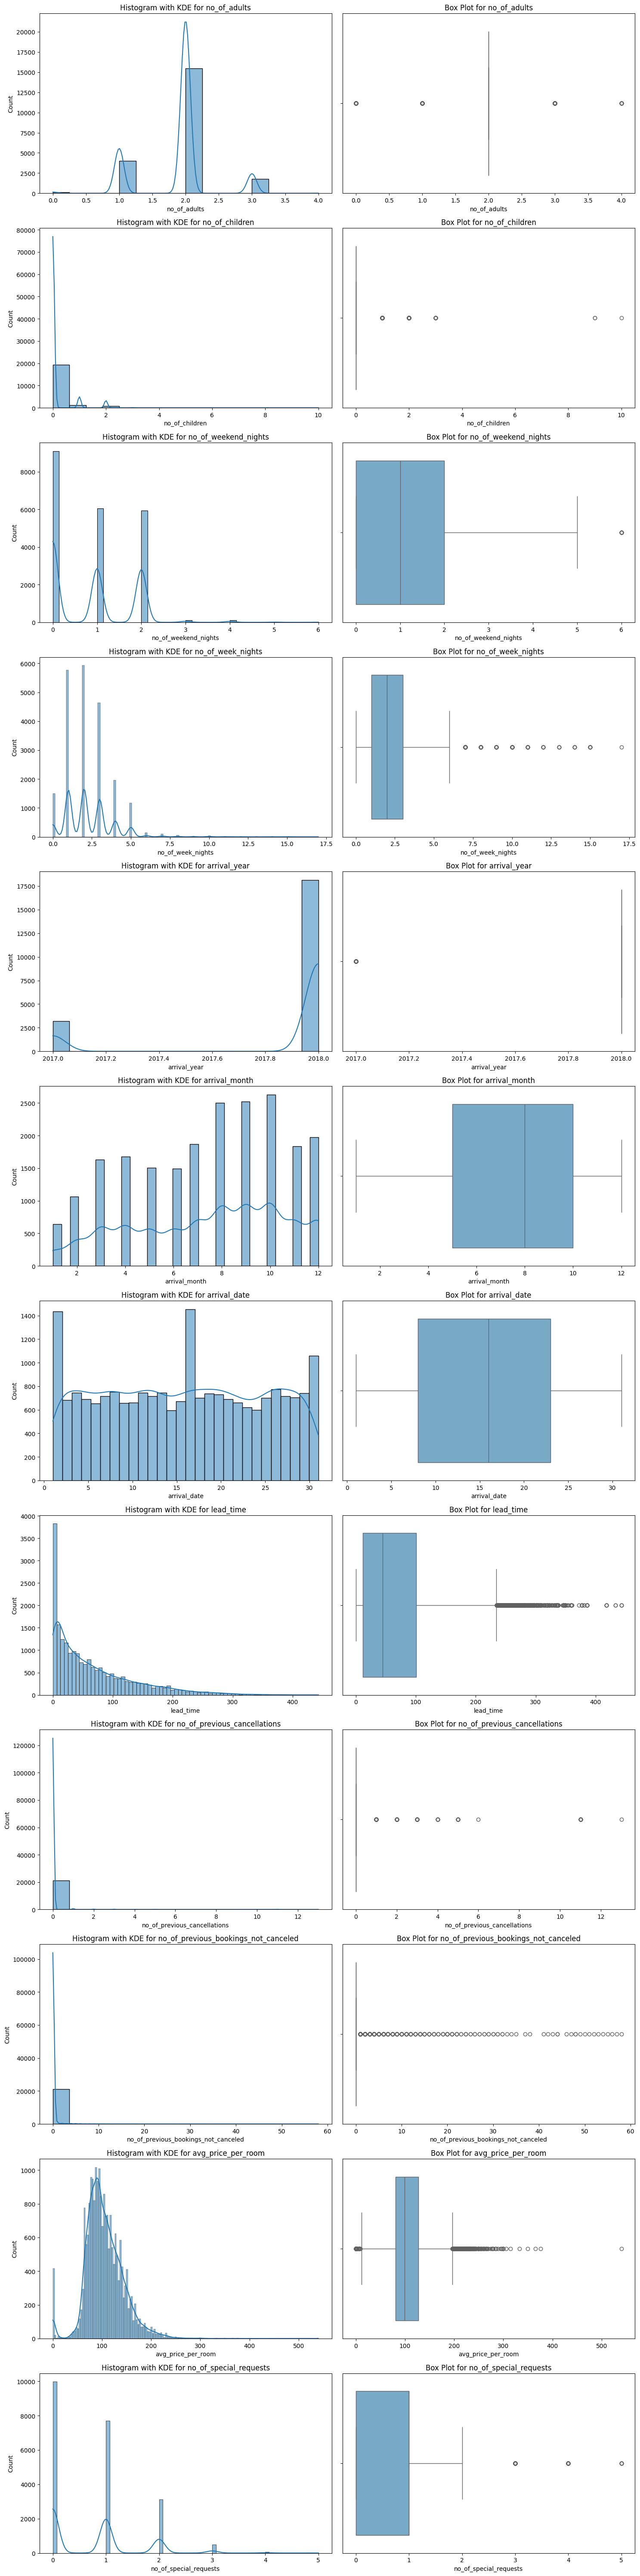

In [28]:
num_plot_dist(data, num_cols)

- Observation from Jupyter NB

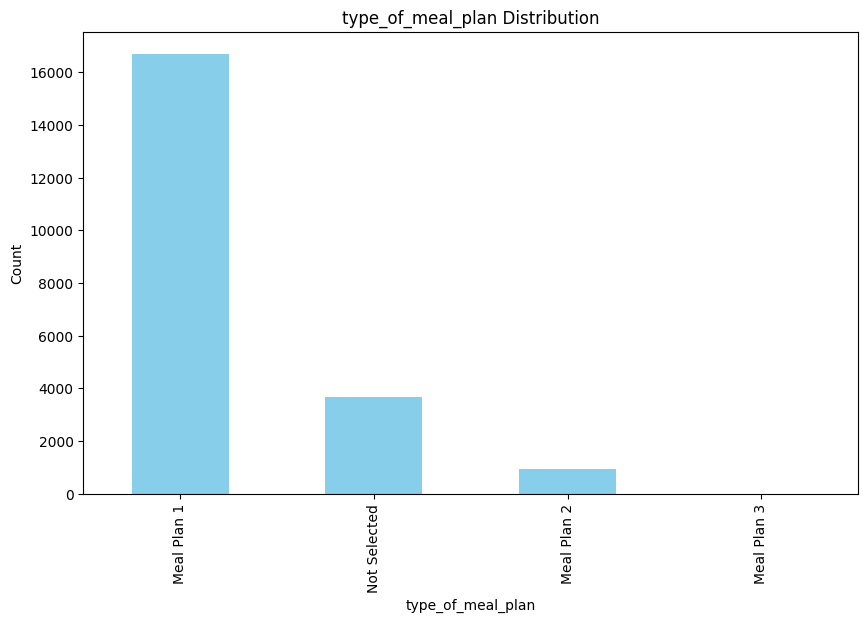

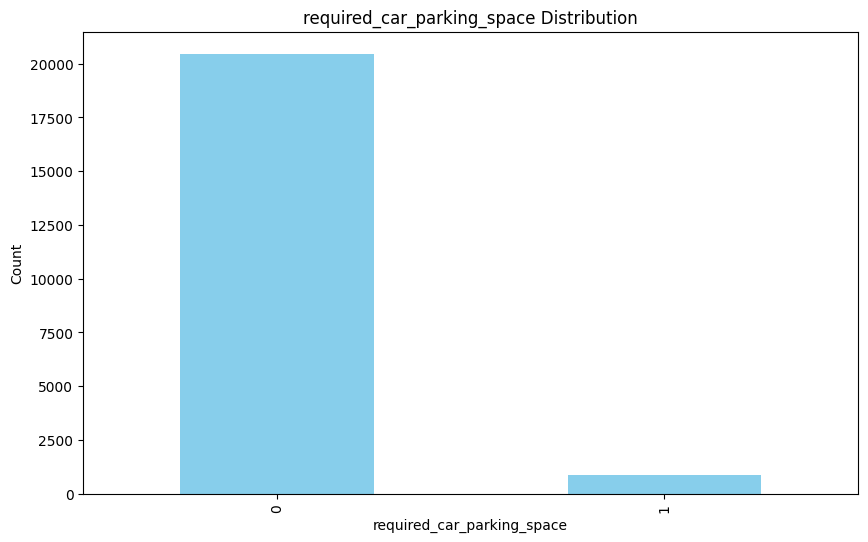

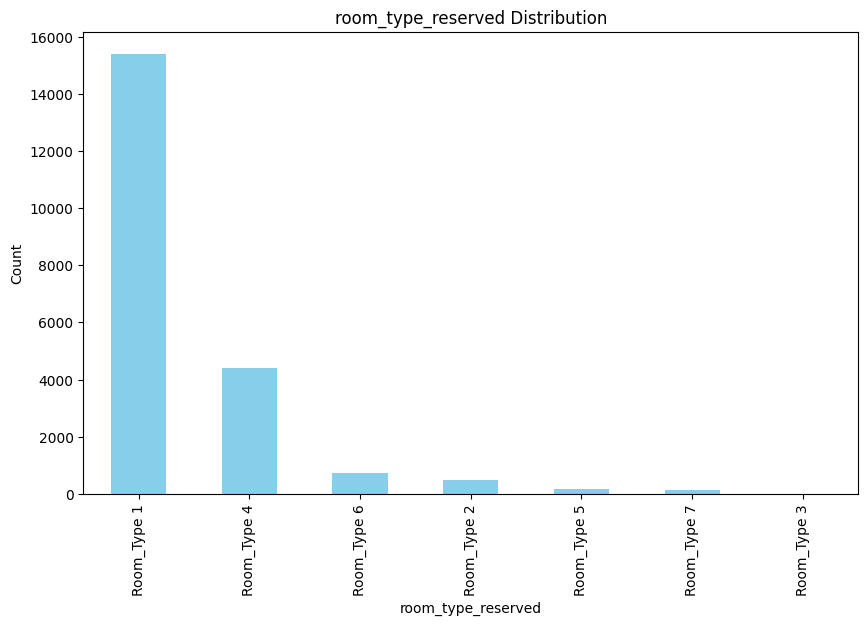

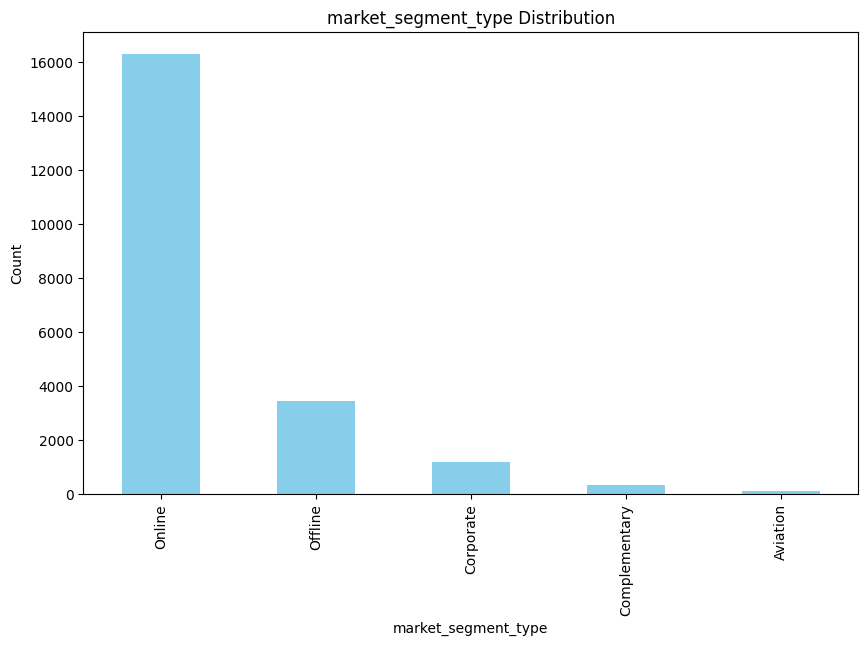

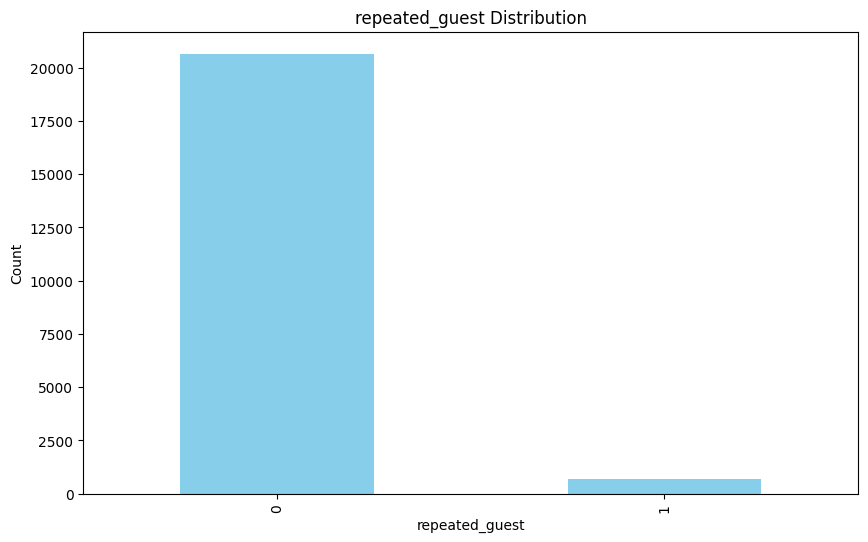

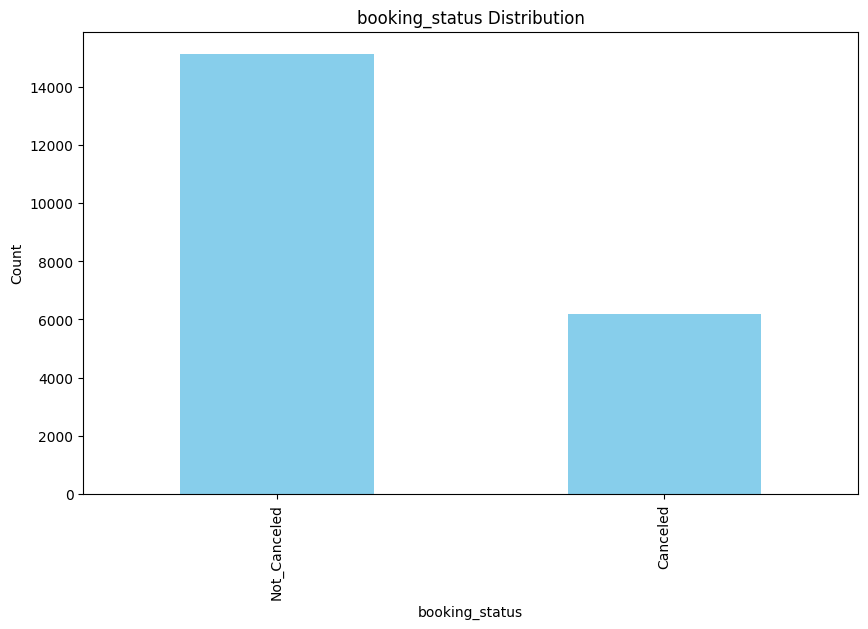

In [30]:
for cat_feature in cat_cols:
        plt.figure(figsize=(10, 6))
        data[cat_feature].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f'{cat_feature} Distribution')
        plt.xlabel(cat_feature)
        plt.ylabel('Count')
        plt.show()

- We have imbalanced data

In [31]:
#################### Bivaraite ############################

In [32]:
def plot_box_target(df, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots + 1) // 2  
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
    
    axes = axes.flatten()
    
    for i, column in enumerate(num_features):
        sns.boxplot(x=target, y=column, ax=axes[i], data=df, palette="Blues")
        axes[i].set_title(f'{column} vs {target}')
    
    plt.tight_layout()
    plt.show()

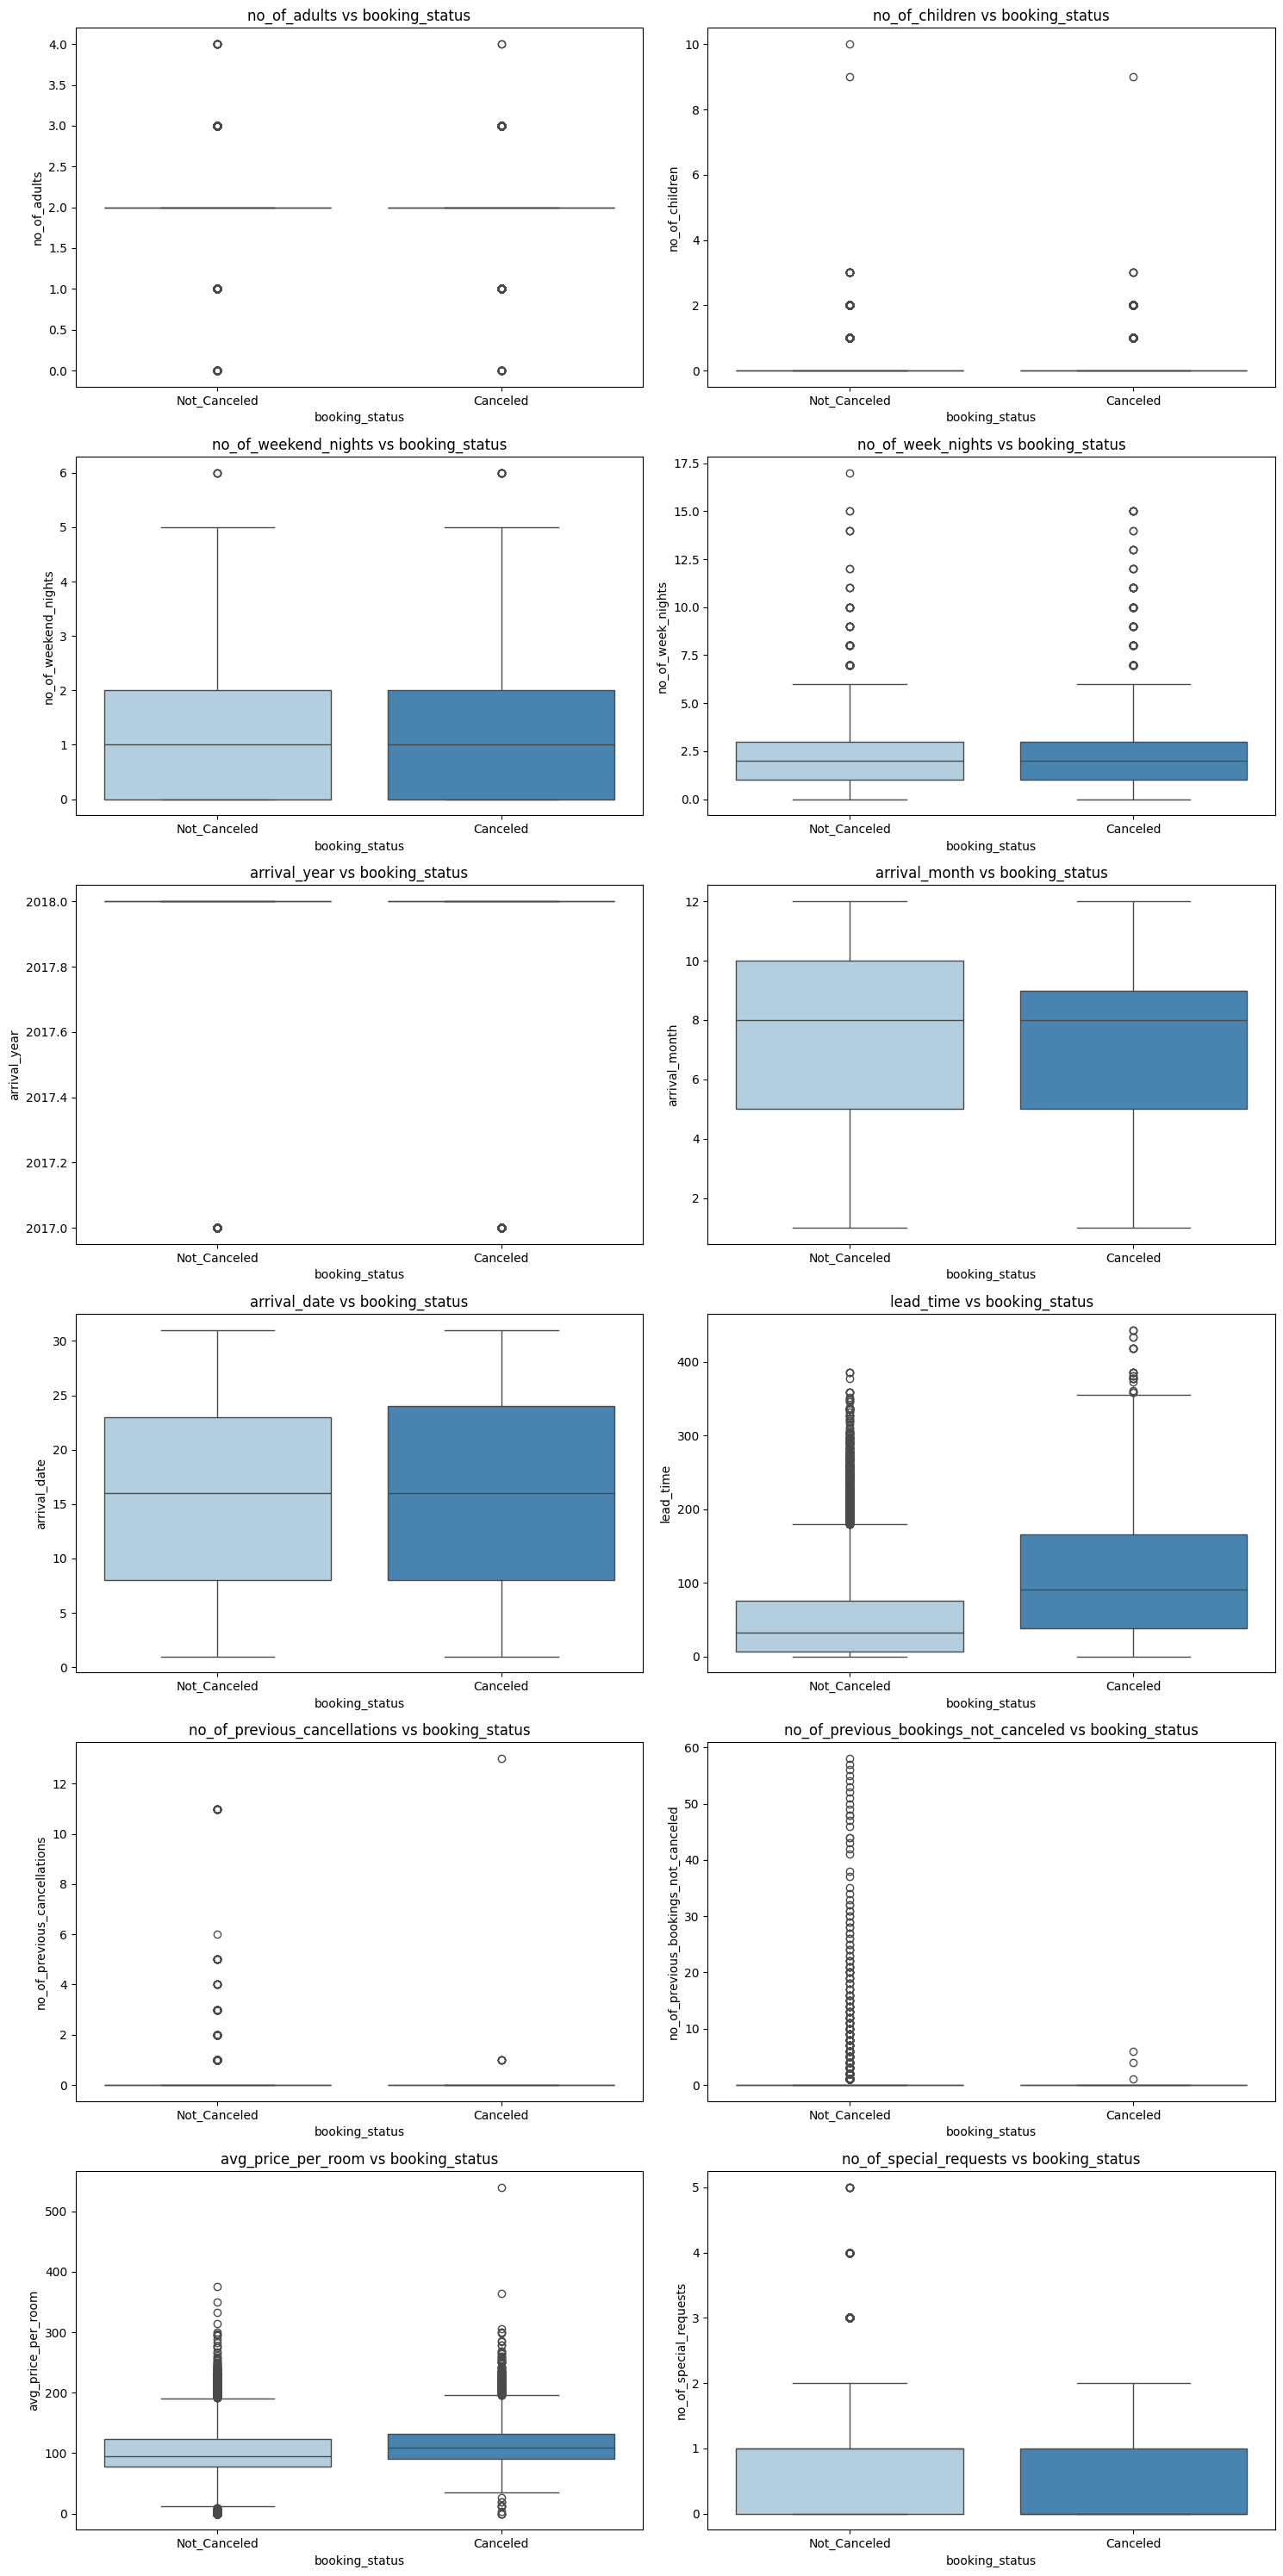

In [33]:
plot_box_target(data, 'booking_status', num_cols)

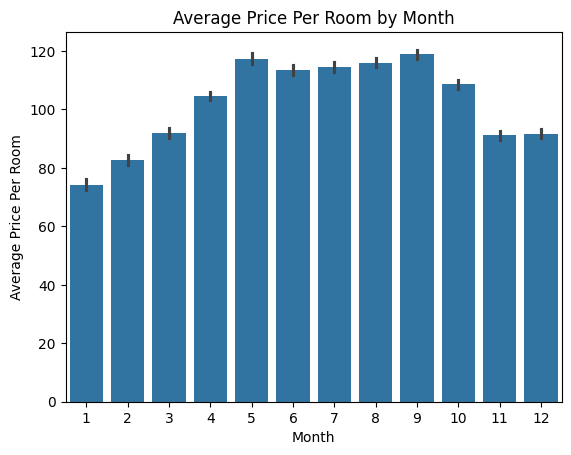

In [34]:
sns.barplot(x='arrival_month', y='avg_price_per_room',data=data)


plt.xlabel('Month')
plt.ylabel('Average Price Per Room')
plt.title('Average Price Per Room by Month')
plt.show()

- Observation in Jupyter NB

In [35]:
def plot_cat_features_with_target(df, target, cat_features):
    num_features = len(cat_features)

    num_row = (num_features + 1) // 2

    fig, axes = plt.subplots(num_row, 2, figsize=(12, num_row * 5))
    
    
    axes = axes.flatten()

    for i, feature in enumerate(cat_features):
        sns.countplot(x=feature, hue=target, data=df, palette="Set2", ax=axes[i])
        axes[i].set_title(f'{feature} vs {target}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

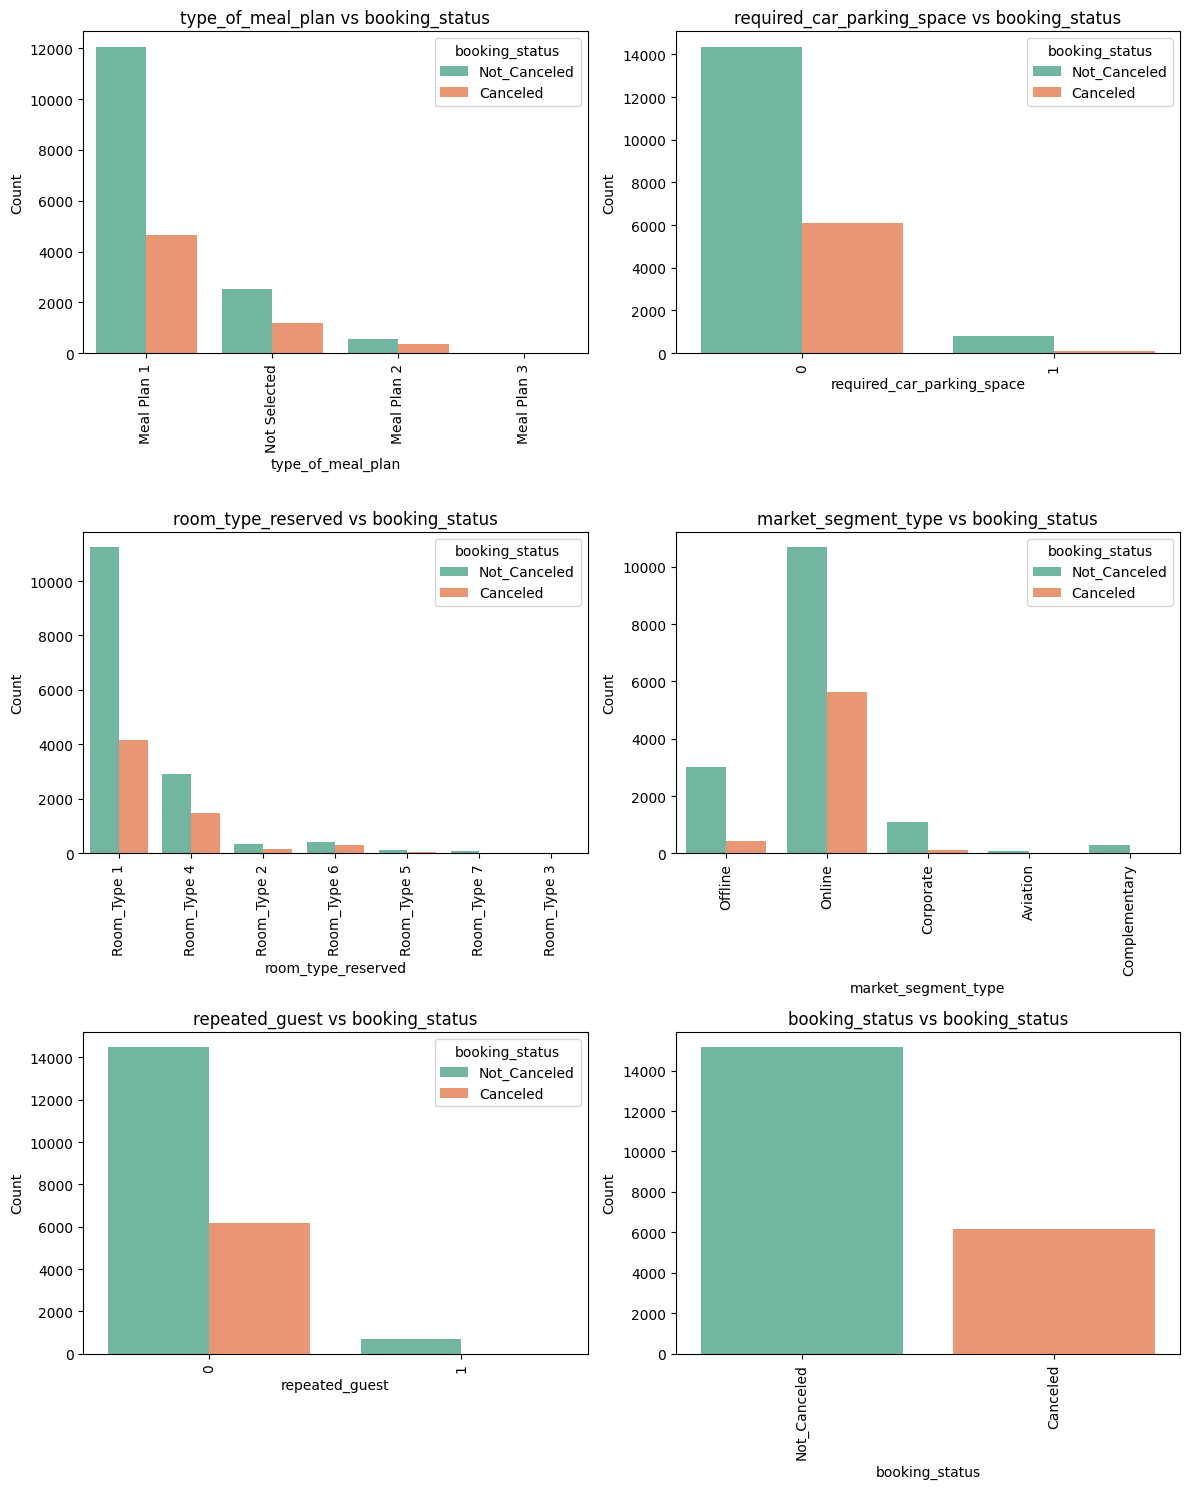

In [36]:
plot_cat_features_with_target(data, 'booking_status', cat_cols)

- Observations in Jupyter NB

In [65]:
df.head()

,no_of_previous_bookings_not_canceled,room_type_reserved,no_of_children,repeated_guest,no_of_special_requests,no_of_adults,arrival_year,no_of_week_nights,type_of_meal_plan,booking_status,required_car_parking_space,market_segment_type,avg_price_per_room,arrival_date,no_of_weekend_nights,arrival_month,lead_time,no_of_previous_cancellations
0,0,Room_Type 1,0,0,0,1,2018,1,Meal Plan 1,Not_Canceled,0,Offline,90.00,17,0,5,6,0
1,0,Room_Type 1,0,0,1,3,2018,2,Meal Plan 1,Not_Canceled,0,Online,90.47,1,0,4,2,0
2,0,Room_Type 4,0,0,0,2,2018,5,Meal Plan 1,Canceled,0,Online,132.30,11,0,10,128,0
3,0,Room_Type 1,0,0,2,2,2018,2,Meal Plan 1,Not_Canceled,0,Online,139.00,21,0,10,29,0
4,0,Room_Type 4,0,0,0,2,2018,5,Meal Plan 1,Canceled,0,Online,97.02,26,2,3,77,0


In [66]:
#### Label Encoding
from sklearn.preprocessing import LabelEncoder


In [67]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Dictionary to hold the mappings for each column
mappings = {}

# Perform Label Encoding for each specified column
for col in cat_cols:
    # Fit and transform the column
    df[col] = label_encoder.fit_transform(df[col])
    # Store the mapping for each column in a readable format
    mappings[col] = {label: code for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}


print("\nLabel Encoding Mappings:")
for col, mapping in mappings.items():
    print(f"{col}:")
    for label, code in mapping.items():
        print(f"  {label}: {code}")


Label Encoding Mappings:
type_of_meal_plan:
  Meal Plan 1: 0
  Meal Plan 2: 1
  Meal Plan 3: 2
  Not Selected: 3
required_car_parking_space:
  0: 0
  1: 1
room_type_reserved:
  Room_Type 1: 0
  Room_Type 2: 1
  Room_Type 3: 2
  Room_Type 4: 3
  Room_Type 5: 4
  Room_Type 6: 5
  Room_Type 7: 6
market_segment_type:
  Aviation: 0
  Complementary: 1
  Corporate: 2
  Offline: 3
  Online: 4
repeated_guest:
  0: 0
  1: 1
booking_status:
  Canceled: 0
  Not_Canceled: 1


In [68]:
df.head()

,no_of_previous_bookings_not_canceled,room_type_reserved,no_of_children,repeated_guest,no_of_special_requests,no_of_adults,arrival_year,no_of_week_nights,type_of_meal_plan,booking_status,required_car_parking_space,market_segment_type,avg_price_per_room,arrival_date,no_of_weekend_nights,arrival_month,lead_time,no_of_previous_cancellations
0,0,0,0,0,0,1,2018,1,0,1,0,3,90.00,17,0,5,6,0
1,0,0,0,0,1,3,2018,2,0,1,0,4,90.47,1,0,4,2,0
2,0,3,0,0,0,2,2018,5,0,0,0,4,132.30,11,0,10,128,0
3,0,0,0,0,2,2,2018,2,0,1,0,4,139.00,21,0,10,29,0
4,0,3,0,0,0,2,2018,5,0,0,0,4,97.02,26,2,3,77,0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21336 entries, 0 to 29018
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_previous_bookings_not_canceled  21336 non-null  int64  
 1   room_type_reserved                    21336 non-null  int64  
 2   no_of_children                        21336 non-null  int64  
 3   repeated_guest                        21336 non-null  int64  
 4   no_of_special_requests                21336 non-null  int64  
 5   no_of_adults                          21336 non-null  int64  
 6   arrival_year                          21336 non-null  int64  
 7   no_of_week_nights                     21336 non-null  int64  
 8   type_of_meal_plan                     21336 non-null  int64  
 9   booking_status                        21336 non-null  int64  
 10  required_car_parking_space            21336 non-null  int64  
 11  market_segment_type 

- all are in number now

In [70]:
#### Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [71]:
# Adding a constant to the features matrix (for the intercept)
X = add_constant(df)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [72]:
vif_data

,feature,VIF
0,const,4.112956e+07
1,no_of_previous_bookings_not_canceled,1.700415e+00
2,room_type_reserved,1.528619e+00
3,no_of_children,1.267298e+00
4,repeated_guest,1.768384e+00
5,no_of_special_requests,1.258976e+00
6,no_of_adults,1.327034e+00
7,arrival_year,1.293353e+00
8,no_of_week_nights,1.130005e+00
9,type_of_meal_plan,1.181146e+00


- There is no multicollinearity

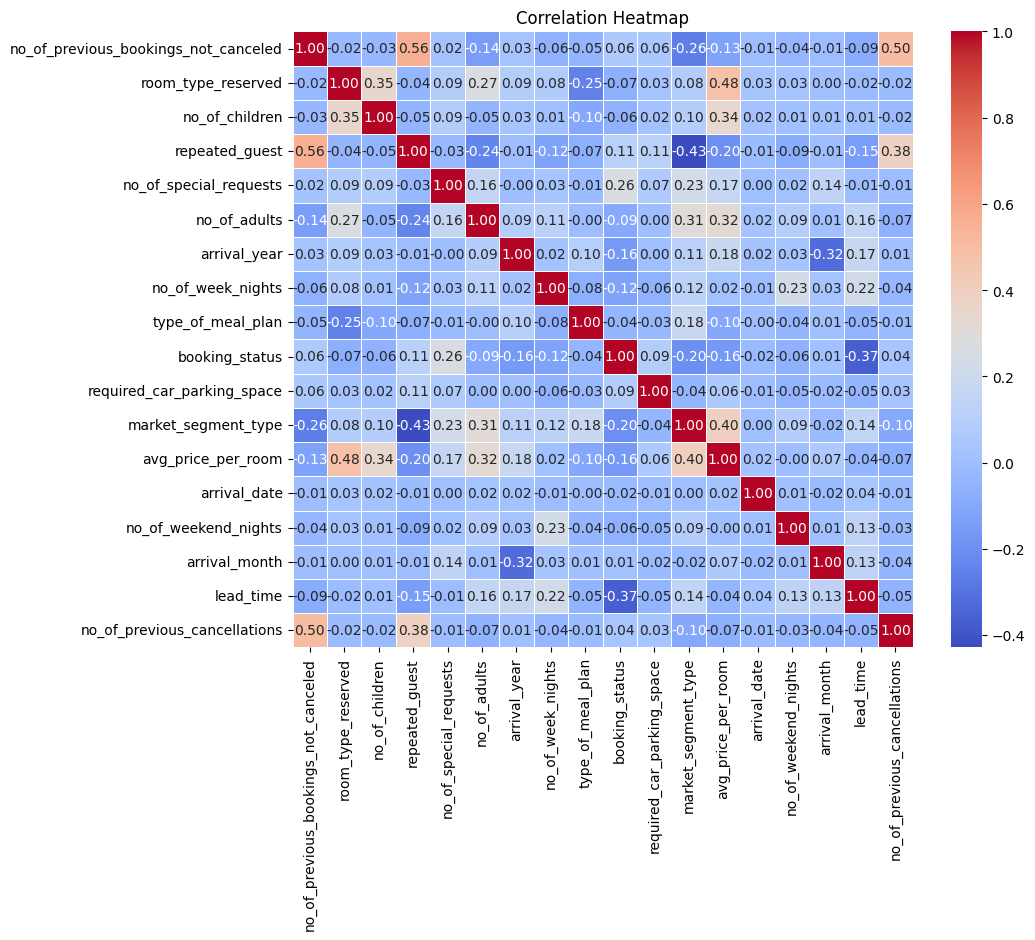

In [73]:
correlation_matrix = df.corr()

# Set up the figure size
plt.figure(figsize=(10, 8))

# Generate the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# Display the heatmap
plt.title('Correlation Heatmap')
plt.show()

In [74]:
skewness = df.skew()

# Display the skewness values
print("Skewness of each column:")
print(skewness)

Skewness of each column:
no_of_previous_bookings_not_canceled    16.512311
room_type_reserved                       1.396445
no_of_children                           4.235752
repeated_guest                           5.321791
no_of_special_requests                   0.935133
no_of_adults                            -0.294818
arrival_year                            -1.952012
no_of_week_nights                        1.516269
type_of_meal_plan                        1.630379
booking_status                          -0.926523
required_car_parking_space               4.632238
market_segment_type                     -2.349435
avg_price_per_room                       0.593288
arrival_date                             0.010303
no_of_weekend_nights                     0.628629
arrival_month                           -0.297638
lead_time                                1.408018
no_of_previous_cancellations            22.138036
dtype: float64


In [75]:
# Apply log transformation to columns with skewness greater than 5
for column in df.columns:
    if skewness[column] > 5:
        df[column] = np.log1p(df[column])  # log1p applies log(1 + x) to handle zero or negative values

# Calculate skewness after transformation
skewness_after = df.skew()

# Print skewness after transformation
print("\nSkewness after transformation:")
print(skewness_after)


Skewness after transformation:
no_of_previous_bookings_not_canceled     7.622693
room_type_reserved                       1.396445
no_of_children                           4.235752
repeated_guest                           5.321791
no_of_special_requests                   0.935133
no_of_adults                            -0.294818
arrival_year                            -1.952012
no_of_week_nights                        1.516269
type_of_meal_plan                        1.630379
booking_status                          -0.926523
required_car_parking_space               4.632238
market_segment_type                     -2.349435
avg_price_per_room                       0.593288
arrival_date                             0.010303
no_of_weekend_nights                     0.628629
arrival_month                           -0.297638
lead_time                                1.408018
no_of_previous_cancellations            13.280846
dtype: float64


In [76]:
df["booking_status"].value_counts()

booking_status
1    15152
0     6184
Name: count, dtype: int64

In [77]:
####3 Imbalanced data handling

In [78]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

In [79]:
!pip install imbalanced-learn


   ---------------------------------------- 0.0/238.4 kB ? eta -:--:--
   ----- --------------------------------- 30.7/238.4 kB 660.6 kB/s eta 0:00:01
   ---------------------------------- ----- 204.8/238.4 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 238.4/238.4 kB 2.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [80]:
print("Class distribution before SMOTE:")
print(y.value_counts())

Class distribution before SMOTE:
booking_status
1    15152
0     6184
Name: count, dtype: int64


In [82]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to balance the dataset (only on the X and y, not the entire DataFrame)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [83]:
# Check the class distribution after applying SMOTE
print("\nClass distribution after SMOTE:")
print(pd.Series(y_res).value_counts())


Class distribution after SMOTE:
booking_status
1    15152
0    15152
Name: count, dtype: int64


In [85]:
# Create a new DataFrame with resampled data
balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df['booking_status'] = y_res


In [86]:
balanced_df["booking_status"].value_counts()

booking_status
1    15152
0    15152
Name: count, dtype: int64

In [87]:
df = balanced_df.copy()

In [88]:
###### Feature Selection #####

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
X = df.drop(columns=['booking_status'])  # Drop the target column
y = df['booking_status']


In [91]:
model = RandomForestClassifier(random_state=42)

# Fit the model to the data
model.fit(X, y)

# Get feature importance
feature_importance = model.feature_importances_

# Create a DataFrame to view feature importance in a more readable format
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importance
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

In [92]:
feature_importance_df

,feature,importance
15,lead_time,0.265743
4,no_of_special_requests,0.181712
11,avg_price_per_room,0.149789
14,arrival_month,0.087603
12,arrival_date,0.082362
10,market_segment_type,0.055618
7,no_of_week_nights,0.044704
13,no_of_weekend_nights,0.029976
8,type_of_meal_plan,0.021268
1,room_type_reserved,0.019775


In [93]:
top_10_features = feature_importance_df['feature'].head(10).values

# Create a new DataFrame with the top 10 features and target column
top_10_df = df[top_10_features.tolist() + ['booking_status']]


In [94]:
top_10_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,6,0,90.00,5,17,3,1,0,0,0,1
1,2,1,90.47,4,1,4,2,0,0,0,1
2,128,0,132.30,10,11,4,5,0,0,3,0
3,29,2,139.00,10,21,4,2,0,0,0,1
4,77,0,97.02,3,26,4,5,2,0,3,0


In [95]:
df = top_10_df.copy()

In [96]:
df.columns

Index(['lead_time', 'no_of_special_requests', 'avg_price_per_room',
       'arrival_month', 'arrival_date', 'market_segment_type',
       'no_of_week_nights', 'no_of_weekend_nights', 'type_of_meal_plan',
       'room_type_reserved', 'booking_status'],
      dtype='object')

In [102]:
!pip install xgboost lightgbm

  Using cached xgboost-2.1.3-py3-none-win_amd64.whl.metadata (2.1 kB)
  Using cached lightgbm-4.5.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached xgboost-2.1.3-py3-none-win_amd64.whl (124.9 MB)
Using cached lightgbm-4.5.0-py3-none-win_amd64.whl (1.4 MB)



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [98]:
X = df.drop(columns=['booking_status'])  # Drop the target column
y = df['booking_status']

In [104]:
# Split the data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Classifier': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}

# Initialize dictionaries to store the evaluation metrics
metrics = {
    'Model': [],
    'Accuracy': [],
    'Recall': [],
    'Precision': [],
    'F1 Score': []
}


In [105]:
# Train and evaluate each classifier
for model_name, classifier in classifiers.items():
    # Train the model
    classifier.fit(X_train, y_train)
    
    # Make predictions
    y_pred = classifier.predict(X_test)
    
    # Calculate the metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store the results
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Recall'].append(recall)
    metrics['Precision'].append(precision)
    metrics['F1 Score'].append(f1)

[LightGBM] [Info] Number of positive: 12107, number of negative: 12136
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 24243, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499402 -> initscore=-0.002392
[LightGBM] [Info] Start training from score -0.002392


In [106]:
# Convert the metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Show the evaluation results
print(metrics_df)

                       Model  Accuracy    Recall  Precision  F1 Score
0              Random Forest  0.880383  0.881773   0.880328  0.881050
1        Logistic Regression  0.767035  0.726765   0.792338  0.758136
2          Gradient Boosting  0.828576  0.838424   0.823548  0.830919
3  Support Vector Classifier  0.729253  0.714614   0.738128  0.726181
4              Decision Tree  0.838640  0.822660   0.851172  0.836673
5        K-Nearest Neighbors  0.775285  0.675534   0.846154  0.751278
6                Naive Bayes  0.765550  0.705747   0.803665  0.751530
7                    XGBoost  0.864214  0.865353   0.864501  0.864927
8                   AdaBoost  0.798053  0.784236   0.808122  0.796000
9                   LightGBM  0.856459  0.865681   0.851146  0.858352


In [107]:
######## Random Forest #########

In [115]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [116]:
X = df.drop(columns=['booking_status'])  # Drop the target column
y = df['booking_status']

In [118]:
# Split the data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

param_dist = {
    'n_estimators': randint(100, 500),               # Randomly select between 100 and 500 trees
    'max_depth': randint(10, 50),                     # Randomly select depth between 10 and 50
    'min_samples_split': randint(2, 10),              # Randomly select min samples to split between 2 and 10
    'min_samples_leaf': randint(1, 5),                # Randomly select min samples per leaf between 1 and 5
    'bootstrap': [True, False]                        # Randomly select True or False for bootstrap
}

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                   n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')

# Fit RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = random_search.best_params_
best_rf_model = random_search.best_estimator_

# Output the best parameters
print(f"Best Hyperparameters: {best_params}")

# Evaluate the model on the test set
y_pred = best_rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Output the metrics
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 413}
Accuracy: 0.8840125391849529
Recall: 0.8883415435139573
Precision: 0.8816818774445893
F1 Score: 0.8849991820709963


- Slight increase in accuracy

In [119]:
import joblib

In [120]:
joblib.dump(best_rf_model, "random_forest_model.pkl")
print("Model saved successfully!")


Model saved successfully!


In [121]:
loaded_model = joblib.load("random_forest_model.pkl")

In [124]:
X_train[0:2]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
11305,2,1,92.000000,1,28,4,1,0,0,0
24111,40,0,114.251314,3,17,4,0,2,0,2


In [125]:
y_train[0:2]

11305    1
24111    0
Name: booking_status, dtype: int64

In [128]:
new_data = np.array([
    [2 ,	1,	92.000000,	1,	28,	4,	1,	0,	0,	0],  # Example instance 1
    [40, 0	, 114.251314 ,	3	,17	,4 ,	0,	2	,0	,2]   # Example instance 2
])

In [129]:
predictions = loaded_model.predict(new_data)

In [130]:
predictions

array([1, 0])